# Modelo de clasifición de imágenes

## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')

## Carga de datos

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Exploración

In [3]:
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Cantidad de imágenes de entrenamiento:", train_images.shape[0])
print("Dimensiones de las imágenes de entrenamiento:", train_images.shape[1:])

print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Cantidad de etiquetas de entrenamiento:", train_labels.shape[0])

print("Clases disponibles:", np.unique(train_labels))

Forma de las imágenes de entrenamiento: (50000, 32, 32, 3)
Cantidad de imágenes de entrenamiento: 50000
Dimensiones de las imágenes de entrenamiento: (32, 32, 3)
Forma de las etiquetas de entrenamiento: (50000, 1)
Cantidad de etiquetas de entrenamiento: 50000
Clases disponibles: [0 1 2 3 4 5 6 7 8 9]


In [4]:
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Venado', 
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

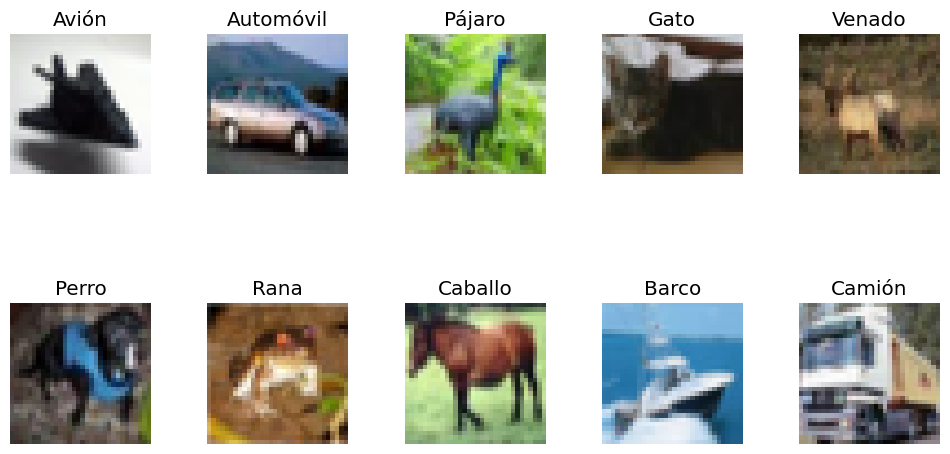

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()

for i in range(10):
    class_images = train_images[train_labels.flatten() == i]
    axs[i].imshow(class_images[0])
    axs[i].set_title(class_names[i])
    axs[i].axis('off')

plt.show()

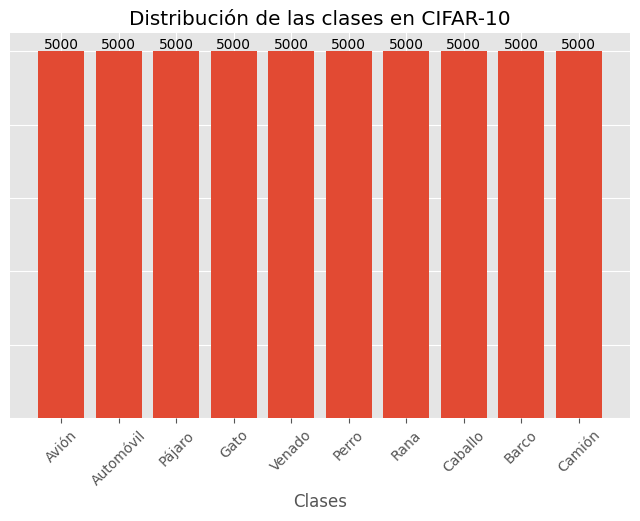

In [6]:
class_counts = np.bincount(train_labels.flatten())

plt.figure(figsize=(8, 5))
plt.bar(class_names, class_counts)
plt.title("Distribución de las clases en CIFAR-10")
plt.xlabel("Clases")
plt.xticks(rotation=45)

# Mostrar los valores numéricos en cada barra
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(left=False, labelleft=False)
plt.show()

In [7]:
class_stats = []
for i in range(10):
    class_images = train_images[train_labels.flatten() == i]
    class_stats.append({
        'Clase': i,
        'Media': np.mean(class_images),
        'Mediana': np.median(class_images),
        'Desviación estándar': np.std(class_images)
    })

for stats in class_stats:
    print(f"Clase: {stats['Clase']}")
    print(f"Media: {stats['Media']}")
    print(f"Mediana: {stats['Mediana']}")
    print(f"Desviación estándar: {stats['Desviación estándar']}")
    print()

Clase: 0
Media: 142.365784765625
Mediana: 144.0
Desviación estándar: 64.73853909545355

Clase: 1
Media: 116.69753678385416
Mediana: 110.0
Desviación estándar: 68.80585772835524

Clase: 2
Media: 119.405596484375
Mediana: 117.0
Desviación estándar: 59.35503796854209

Clase: 3
Media: 116.23182356770833
Mediana: 112.0
Desviación estándar: 65.73623445409122

Clase: 4
Media: 111.77529895833334
Mediana: 108.0
Desviación estándar: 55.12504739169545

Clase: 5
Media: 117.39423971354167
Mediana: 114.0
Desviación estándar: 63.767677428958365

Clase: 6
Media: 106.5619337890625
Mediana: 102.0
Desviación estándar: 58.365601916903394

Clase: 7
Media: 118.89019752604166
Mediana: 114.0
Desviación estándar: 63.46949659666773

Clase: 8
Media: 133.47602604166667
Mediana: 134.0
Desviación estándar: 63.422404620145166

Clase: 9
Media: 124.27721360677083
Mediana: 118.0
Desviación estándar: 69.59517222165302



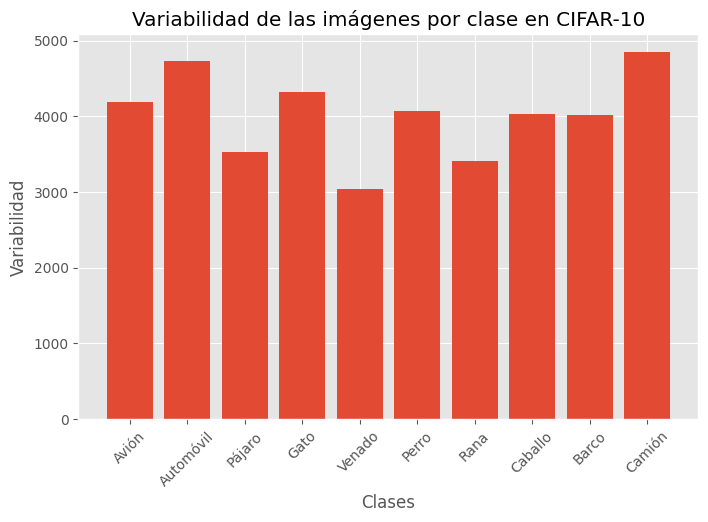

In [8]:
class_variability = []
for i in range(10):
    class_images = train_images[train_labels.flatten() == i]
    class_variability.append(np.var(class_images))

plt.figure(figsize=(8, 5))
plt.bar(class_names, class_variability)
plt.title("Variabilidad de las imágenes por clase en CIFAR-10")
plt.xlabel("Clases")
plt.ylabel("Variabilidad")
plt.xticks(rotation=45)

plt.show()

## Modelos

### CNN

In [9]:
x_train = train_images.astype('float32') / 255
x_test = test_images.astype('float32') / 255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
782/782 [==============================] - 11s 11ms/step - loss: 1.5628 - accuracy: 0.4281 - val_loss: 1.1947 - val_accuracy: 0.5732
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.1570 - accuracy: 0.5866 - val_loss: 0.9436 - val_accuracy: 0.6697
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.9947 - accuracy: 0.6492 - val_loss: 0.8519 - val_accuracy: 0.6987
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.8881 - accuracy: 0.6873 - val_loss: 0.8123 - val_accuracy: 0.7169
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.8212 - accuracy: 0.7118 - val_loss: 0.7669 - val_accuracy: 0.7334
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7666 - accuracy: 0.7299 - val_loss: 0.7358 - val_accuracy: 0.7440
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7259 - accuracy: 0.7452 - val_loss: 0.7006 - val_accuracy: 0.754